In [6]:
import sys
sys.path.append('..')
from vao.core import Context
from vao.clean import CleanLines
from vao.chapters import VOCAB39
from pathlib import Path
import pandas as pd
import Levenshtein as L
import seaborn as sns
import numpy as np

In [2]:
DB = Path('DB')
DBCTX = DB / 'DB-Contex'
DBCTXVB = DB / 'DB-ContexVocab'
DBRAW = DB / 'DB-Raw'

In [3]:
context_paths = list(DBCTXVB.glob('*.json'))
sample = context_paths[0]

In [4]:
sample_context = Context.load(sample)
print(sample_context.about)

chapter_kw = ['film']
header_kw = ['adhesive film']
subheader_kw = ['width exceeding 20 cm']
keywords = chapter_kw + header_kw + subheader_kw
keywords_splt = ['film', 'adhesive', 'width', 'exceeding', '20', 'cm']

summary = sample_context.generate_summary()
print(f"avg wor count: {summary['avg']['avg_words_in_line']}")

M = sample_context.M
lines_df = pd.DataFrame(M.groupby('line').count()).reset_index()
lines_df_f = lines_df[lines_df['word'] > summary['avg']['avg_words_in_line']]

new_lines = lines_df_f['line'].values.tolist()
new_lines_cleaned = CleanLines.match_vocab(new_lines, subheader_kw)
print(f"new lines: {len(new_lines)} after: {len(new_lines_cleaned)} # Not working")

all_lines = lines_df['line'].values
m_split = Context(CleanLines.match_vocab(all_lines, keywords, mode='split'))
m_ssplit = Context(CleanLines.match_vocab(all_lines, keywords, mode='ssplit'))
m_contain = Context(CleanLines.match_vocab(all_lines, keywords, mode='contain'))

{'link': 'https://www.3m.com/3M/en_US/p/dc/v100774093/'}
avg wor count: 13.477272727272727
new lines: 18 after: 0 # Not working


In [5]:
def match_vocab_summary(sample: Context, mode: str, keywords):
    all_lines = sample.filter_line_above_average_word_count()
    cleaned = CleanLines.match_vocab(all_lines, keywords, mode=mode)
    if cleaned:
        context_filtered = Context(cleaned)
        context_filtered.plot_word_dict_graph(keywords)
        print(context_filtered.get_word_dict(context_filtered.summary['word_frequency'], keywords))
        print(f'''{context_filtered.summary['counts']}
{keywords}''')
    else:
        print('No Matching Lines Found')

      line
word      
film     7
{'char_count': 932, 'word_count': 183, 'line_count': 7}
['film', 'adhesive film', 'width exceeding 20 cm']


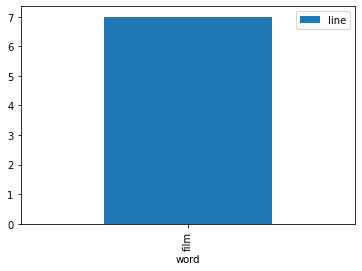

In [6]:
match_vocab_summary(sample_context, 'split', keywords)

          line
word          
film         7
adhesive     3
{'char_count': 1206, 'word_count': 241, 'line_count': 9}
['film', 'adhesive', 'width', 'exceeding', '20', 'cm']


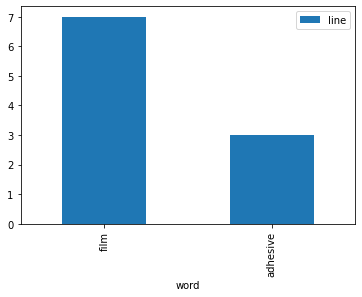

In [7]:
match_vocab_summary(sample_context, 'ssplit', keywords_splt)

      line
word      
film     7
{'char_count': 932, 'word_count': 183, 'line_count': 7}
['film', 'adhesive film', 'width exceeding 20 cm']


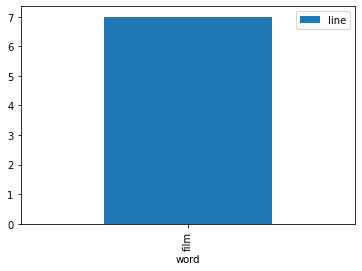

In [8]:
match_vocab_summary(sample_context, 'contain', keywords)

In [9]:
def match_vocab_summary_with_correlation(sample, mode, keywords, threshold, max_length=900):
    all_lines = sample.filter_line_above_average_word_count()
    cleaned = CleanLines.match_vocab(all_lines, keywords, mode=mode)
    context_filtered = Context(cleaned)

    if cleaned:
        context_filtered.plot_line_correlations()
    
        context_filtered = Context(context_filtered.filter_lines_on_correlation_threshold(threshold, max_length))

        context_filtered.plot_word_dict_graph(keywords)
        print(f'''{context_filtered.summary['counts']}
    {keywords}''')
    else:
        print('No Matching Lines Found')

{'char_count': 848, 'word_count': 175, 'line_count': 7}
    ['film', 'adhesive', 'width', 'exceeding', '20', 'cm']


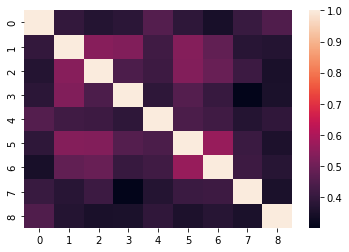

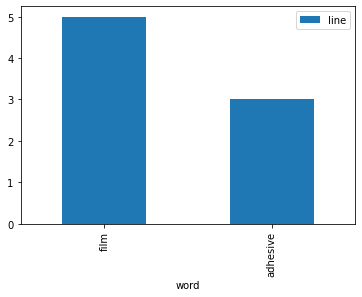

In [10]:
match_vocab_summary_with_correlation(sample_context, 'ssplit', keywords_splt, 0.6)

{'char_count': 1206, 'word_count': 241, 'line_count': 9}
    ['film', 'adhesive', 'width', 'exceeding', '20', 'cm']


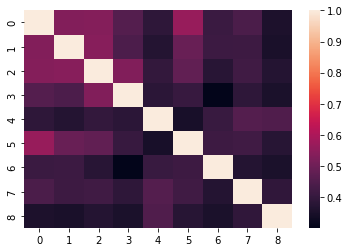

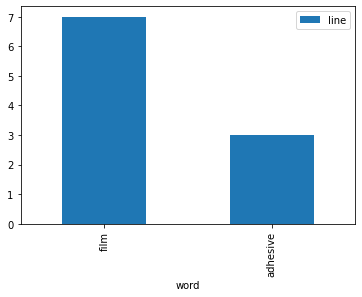

In [11]:
match_vocab_summary_with_correlation(sample_context, 'split', keywords_splt, 0.6)

{'char_count': 1206, 'word_count': 241, 'line_count': 9}
    ['film', 'adhesive', 'width', 'exceeding', '20', 'cm']


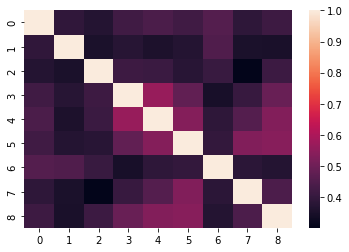

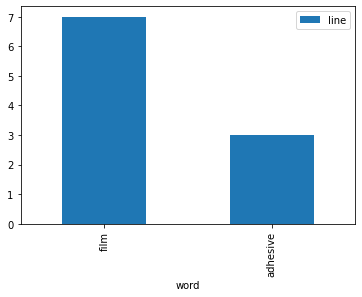

In [12]:
match_vocab_summary_with_correlation(sample_context, 'contain', keywords_splt, 0.6)

In [13]:
def look(context_path, keywords, threshold):
    sample_context = Context.load(context_path)
    keywords_splt = []
    for word in keywords:
        keywords_splt.extend(word.split(' '))

    print('-'*100)
    print(f"about context: {sample_context.about}")
    print("Selecting sentences if words in sentence are found in the keywords that are split at ' ")
    print(f"keywords: {keywords_splt}")
    print(f"method name: ssplit")
    print(f"count summary of context: {sample_context.summary['counts']}")
    match_vocab_summary(sample_context, 'ssplit', keywords_splt)
    print(f'correlation threshold: {threshold}')
    match_vocab_summary_with_correlation(sample_context, 'ssplit', keywords_splt, threshold)
    print('-'*100)


----------------------------------------------------------------------------------------------------
about context: {'link': 'https://www.3m.com/3M/en_US/p/dc/v000090422/'}
Selecting sentences if words in sentence are found in the keywords that are split at ' 
keywords: ['polyester', 'film', 'tape', 'acrylic', 'adhesive']
method name: ssplit
count summary of context: {'char_count': 2932, 'word_count': 529, 'line_count': 46}
           line
word           
tape         10
polyester     6
film          5
acrylic       2
adhesive      1
{'char_count': 778, 'word_count': 155, 'line_count': 9}
['polyester', 'film', 'tape', 'acrylic', 'adhesive']
correlation threshold: 0.6
{'char_count': 664, 'word_count': 126, 'line_count': 7}
    ['polyester', 'film', 'tape', 'acrylic', 'adhesive']
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------


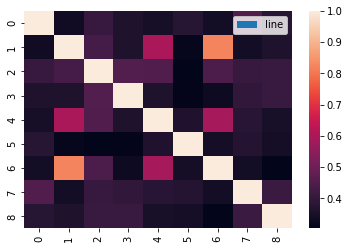

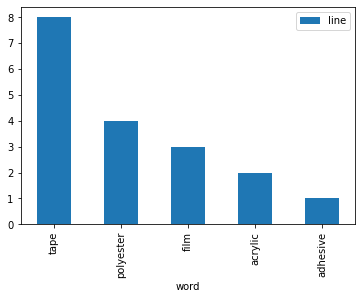

In [14]:
look(context_paths[2], ['polyester film tape', 'acrylic adhesive'], 0.6)

----------------------------------------------------------------------------------------------------
about context: {'link': 'https://www.3m.com.sg/3M/en_SG/p/d/b40067251/?preselect=4294939440'}
Selecting sentences if words in sentence are found in the keywords that are split at ' 
keywords: ['polyethylene', 'foam', 'adhesive', 'tape']
method name: ssplit
count summary of context: {'char_count': 3547, 'word_count': 684, 'line_count': 48}
          line
word          
tape        22
adhesive     5
foam         4
{'char_count': 2718, 'word_count': 541, 'line_count': 23}
['polyethylene', 'foam', 'adhesive', 'tape']
correlation threshold: 0.6
{'char_count': 1887, 'word_count': 340, 'line_count': 11}
{'char_count': 1887, 'word_count': 340, 'line_count': 11}
{'char_count': 1887, 'word_count': 340, 'line_count': 11}
{'char_count': 1887, 'word_count': 340, 'line_count': 11}
{'char_count': 1887, 'word_count': 340, 'line_count': 11}
{'char_count': 1887, 'word_count': 340, 'line_count': 11}
{'cha

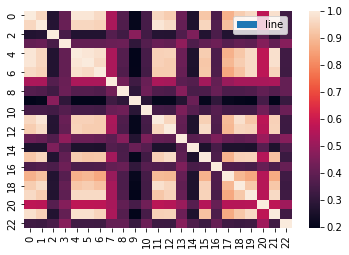

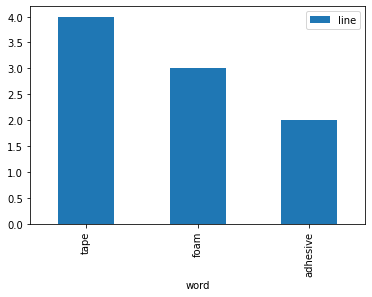

In [28]:
look(context_paths[67], ['polyethylene foam', 'adhesive tape'], 0.6)

----------------------------------------------------------------------------------------------------
about context: {'link': 'https://www.3m.com/3M/en_US/p/d/b00013686/'}
Selecting sentences if words in sentence are found in the keywords that are split at ' 
keywords: ['vinyl', 'cushion', 'mats', 'enhancing', 'security', 'footing']
method name: ssplit
count summary of context: {'char_count': 745, 'word_count': 118, 'line_count': 25}
           line
word           
cushion       1
enhancing     1
footing       1
security      1
vinyl         1
{'char_count': 211, 'word_count': 40, 'line_count': 2}
['vinyl', 'cushion', 'mats', 'enhancing', 'security', 'footing']
correlation threshold: 0.8
# 0.8
{'char_count': 211, 'word_count': 40, 'line_count': 2}
    ['vinyl', 'cushion', 'mats', 'enhancing', 'security', 'footing']
----------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------

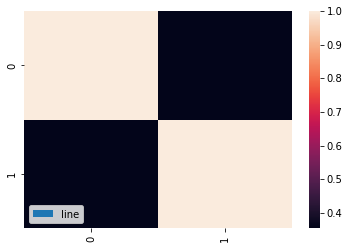

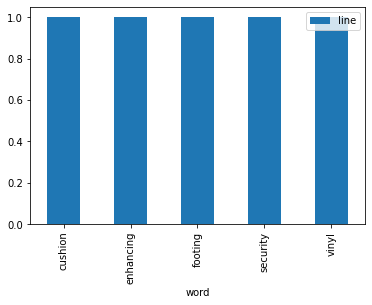

In [29]:
look(context_paths[89], ['vinyl', 'cushion mats enhancing security footing'], 0.8)